In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
lstm = pd.read_excel('FinalON.xlsx')

In [3]:
lstm.sample()

,Date,provincename,Construction,Transportation,Agriculture,Population,Station Name,Max Temp (Â°C),Total Snow (cm),Total Precip (mm),Min Temp (Â°C),Mean Temp (Â°C),Heat Deg Days (Â°C),Cool Deg Days (Â°C),Longitude (x),Latitude (y)
614,2020-03-01,Ontario,1.723768,0.793924,4.731315,316,Dorion,5.1,1.463636,0.0,-10.8,-2.8,20.8,0.0,-89.33,48.37


# Ontario
# Dorion Construction

In [5]:
lstm_Construction_dorion = lstm[lstm['Station Name'] == 'Dorion'][['Date', 'Construction']]
lstm_Construction_dorion.set_index('Date', inplace=True)
lstm_Construction_dorion.index = pd.to_datetime(lstm_Construction_dorion.index)

In [6]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_Construction_dorion['Construction'] = scaler.fit_transform(lstm_Construction_dorion[['Construction']])


In [7]:
lstm_Construction_dorion['Construction'].head()

Date
2013-01-01    0.061668
2013-02-01    0.000000
2013-03-01    0.056483
2013-04-01    0.060070
2013-05-01    0.068929
Name: Construction, dtype: float64

In [8]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [9]:
sequence_length = 11
X, y = create_sequences(lstm_Construction_dorion['Construction'].values, sequence_length)


In [10]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [11]:
n_steps =11
n_features =1

In [12]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

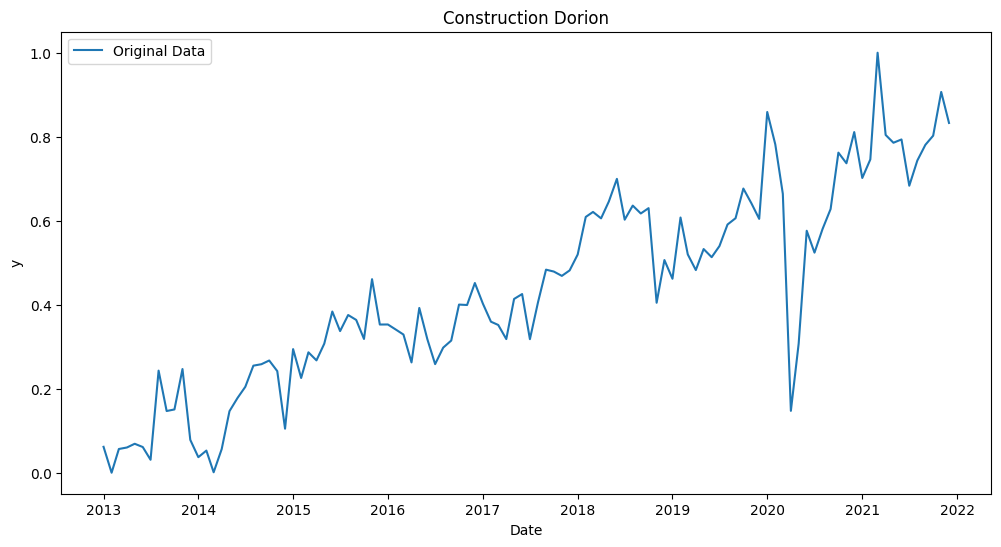

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_Construction_dorion.index, lstm_Construction_dorion['Construction'], label='Original Data')
plt.title('Construction Dorion')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [14]:
#Scaling the data
scaler = MinMaxScaler()
lstm_Construction_dorion[['Construction']] = scaler.fit_transform(lstm_Construction_dorion[['Construction']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_Construction_dorion) * 0.8)
train, test = lstm_Construction_dorion[:train_size], lstm_Construction_dorion[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Construction'].values, sequence_length)
X_test, y_test = create_sequences(test['Construction'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


1/1 [==============================] - 0s 60ms/step


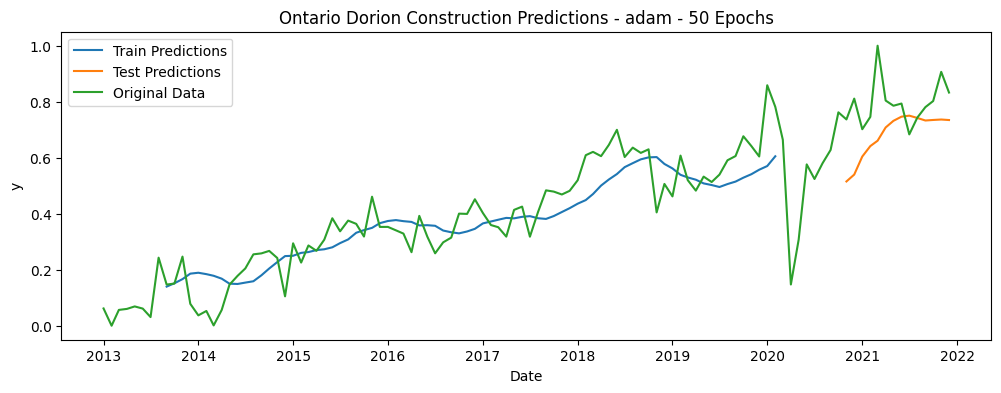

Metrics for adam - 50 Epochs:
Train MSE: 0.05201042948724247
Test MSE: 0.024316549569037952
Train MAE: 0.0706380733458329
Test MAE: 0.12021050355890413
Train RMSE: 0.08862830814266767
Test RMSE: 0.15177456530511987
1/1 [==============================] - 0s 37ms/step


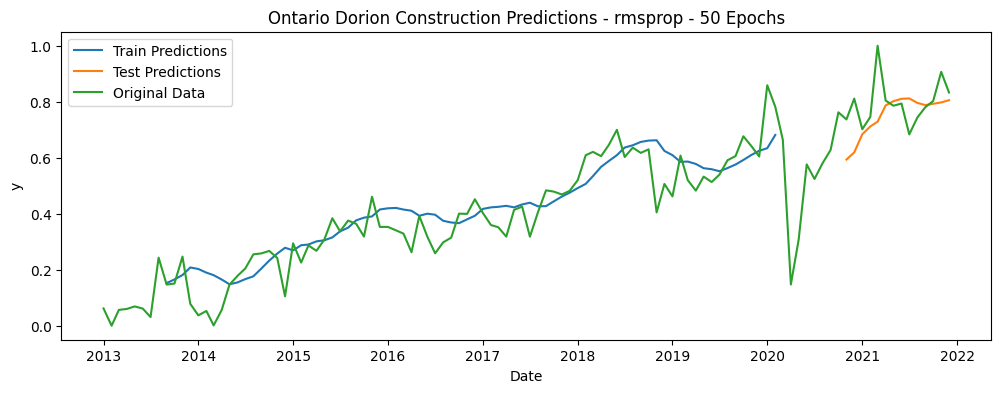

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.056940093863187734
Test MSE: 0.013017928903146434
Train MAE: 0.06228528804921846
Test MAE: 0.07462337544471646
Train RMSE: 0.08206567478442288
Test RMSE: 0.10875252031272417
1/1 [==============================] - 0s 43ms/step


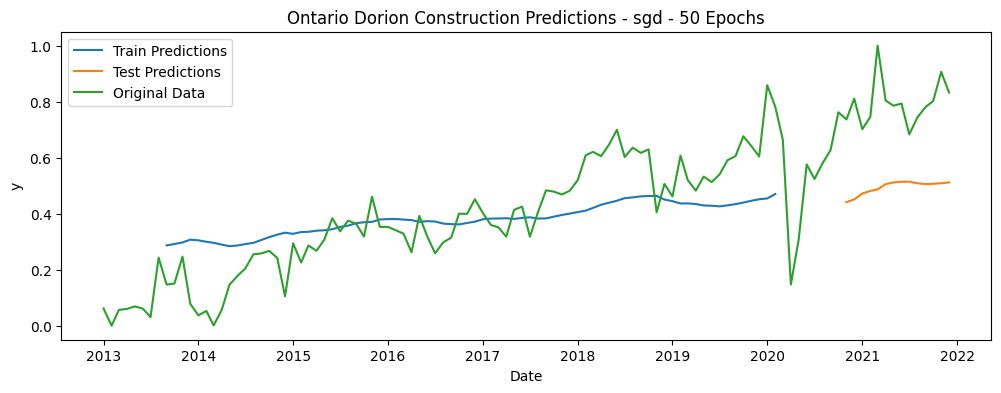

Metrics for sgd - 50 Epochs:
Train MSE: 0.03597388770139259
Test MSE: 0.09699955259563821
Train MAE: 0.10802251410731187
Test MAE: 0.300488696831224
Train RMSE: 0.13612865490732365
Test RMSE: 0.31084092158075405
1/1 [==============================] - 0s 47ms/step


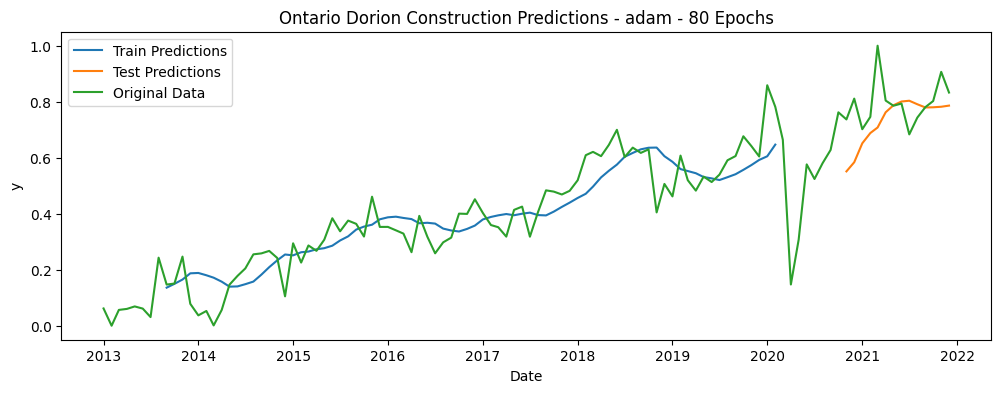

Metrics for adam - 80 Epochs:
Train MSE: 0.05510931298749014
Test MSE: 0.01654448769950154
Train MAE: 0.0646166487287673
Test MAE: 0.08762169787138996
Train RMSE: 0.08222948693915198
Test RMSE: 0.12364669447202795
1/1 [==============================] - 0s 55ms/step


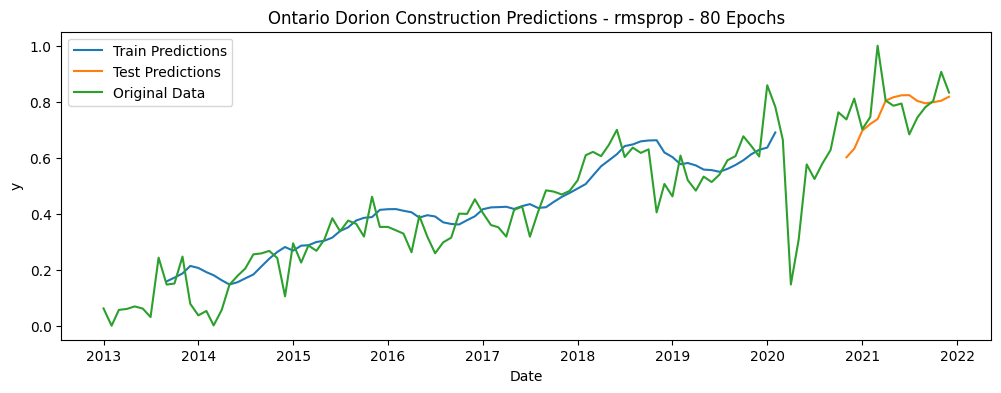

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.05665298874854624
Test MSE: 0.012243184008911293
Train MAE: 0.06132136055395618
Test MAE: 0.0716349603397142
Train RMSE: 0.08085540254770944
Test RMSE: 0.10547981370474319
1/1 [==============================] - 0s 51ms/step


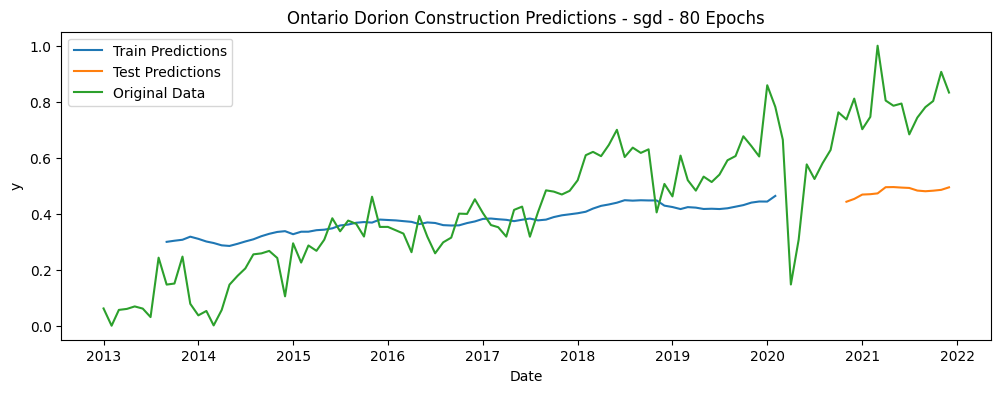

Metrics for sgd - 80 Epochs:
Train MSE: 0.035450720123092805
Test MSE: 0.10615325160142187
Train MAE: 0.11255671241285757
Test MAE: 0.3158318477534543
Train RMSE: 0.14084223204098653
Test RMSE: 0.32549968065741736
1/1 [==============================] - 0s 47ms/step


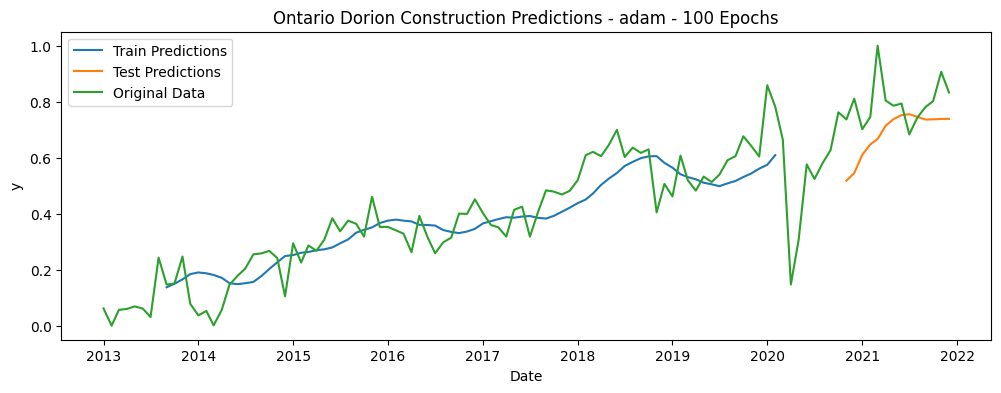

Metrics for adam - 100 Epochs:
Train MSE: 0.05231552339560826
Test MSE: 0.023289228750609618
Train MAE: 0.0703293611630688
Test MAE: 0.11672220720616101
Train RMSE: 0.08824480800699804
Test RMSE: 0.14841261096072073
1/1 [==============================] - 0s 46ms/step


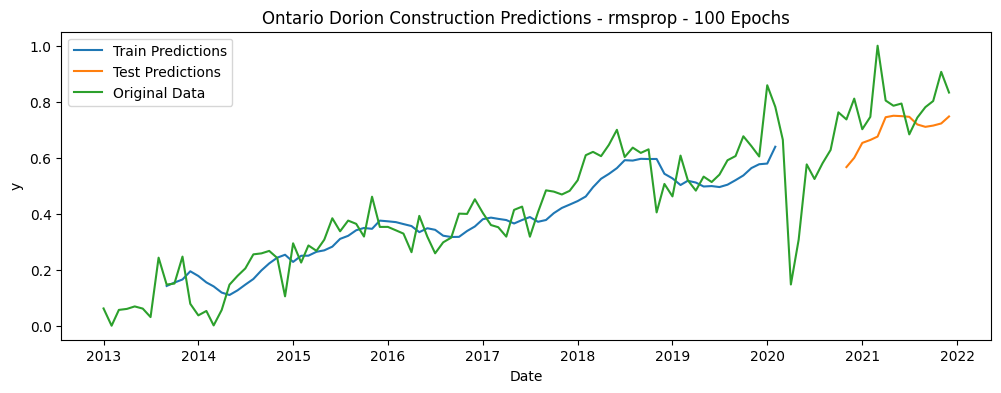

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.05354115972266474
Test MSE: 0.01886486174768516
Train MAE: 0.0649059973270514
Test MAE: 0.10663181616353581
Train RMSE: 0.08127235660188199
Test RMSE: 0.13454578337116102
1/1 [==============================] - 0s 56ms/step


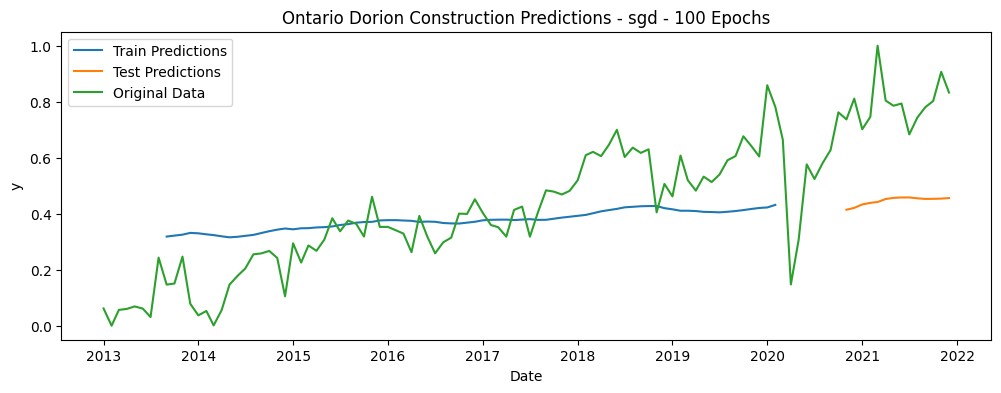

Metrics for sgd - 100 Epochs:
Train MSE: 0.03434726340419547
Test MSE: 0.1280067267779404
Train MAE: 0.1225320999127402
Test MAE: 0.34879394008493186
Train RMSE: 0.15349117940072815
Test RMSE: 0.3574827798002925
1/1 [==============================] - 0s 36ms/step


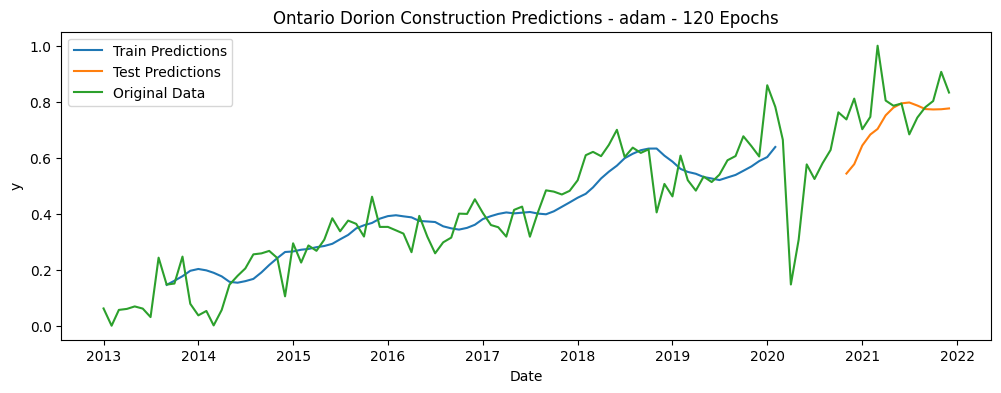

Metrics for adam - 120 Epochs:
Train MSE: 0.05346614206726858
Test MSE: 0.017490858597159695
Train MAE: 0.06508669392259349
Test MAE: 0.09217901413686944
Train RMSE: 0.08413543290256847
Test RMSE: 0.12751126423308498
1/1 [==============================] - 0s 40ms/step


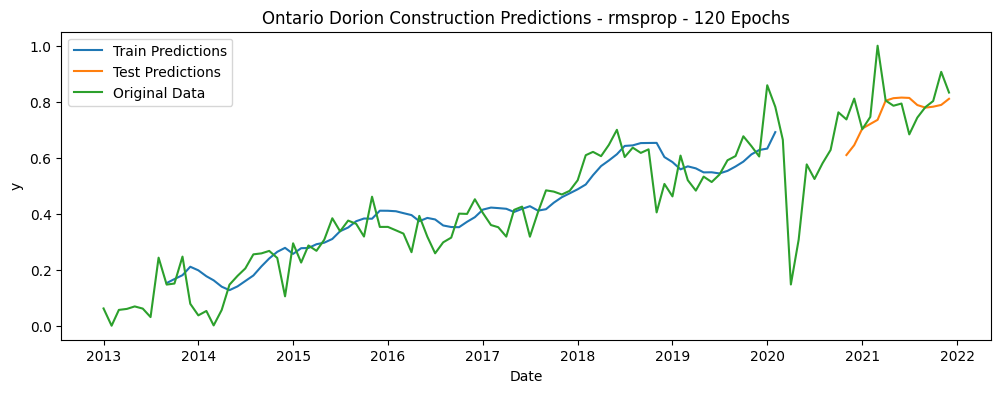

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.05685038537096642
Test MSE: 0.011586662108860538
Train MAE: 0.05962234707882292
Test MAE: 0.06941118436502146
Train RMSE: 0.0774605364986293
Test RMSE: 0.10332937156212343
1/1 [==============================] - 0s 30ms/step


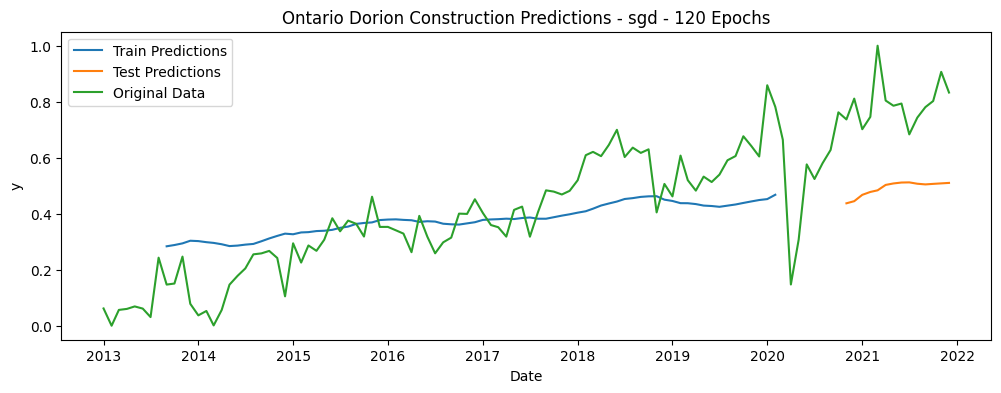

Metrics for sgd - 120 Epochs:
Train MSE: 0.0360626029239577
Test MSE: 0.09875783656930405
Train MAE: 0.10789018841194252
Test MAE: 0.3033053505086194
Train RMSE: 0.13642442253161294
Test RMSE: 0.3135662160410171


In [15]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_Construction_dorion.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_Construction_dorion.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_Construction_dorion.index, lstm_Construction_dorion['Construction'], label='Original Data')
        plt.title(f'Ontario Dorion Construction Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Construction'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Construction'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Construction'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Construction'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Construction'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Construction'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

# Dorion Transportation

In [16]:
lstm_transportation_dorion = lstm[lstm['Station Name'] == 'Dorion'][['Date', 'Transportation']]
lstm_transportation_dorion.set_index('Date', inplace=True)
lstm_transportation_dorion.index = pd.to_datetime(lstm_transportation_dorion.index)

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_transportation_dorion['Transportation'] = scaler.fit_transform(lstm_transportation_dorion[['Transportation']])


In [19]:
lstm_transportation_dorion['Transportation'].head()


Date
2013-01-01    0.439680
2013-02-01    0.414387
2013-03-01    0.483557
2013-04-01    0.506861
2013-05-01    0.457678
Name: Transportation, dtype: float64

In [20]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [21]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [22]:
n_steps =11
n_features =1

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [24]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Text(0, 0.5, 'y')

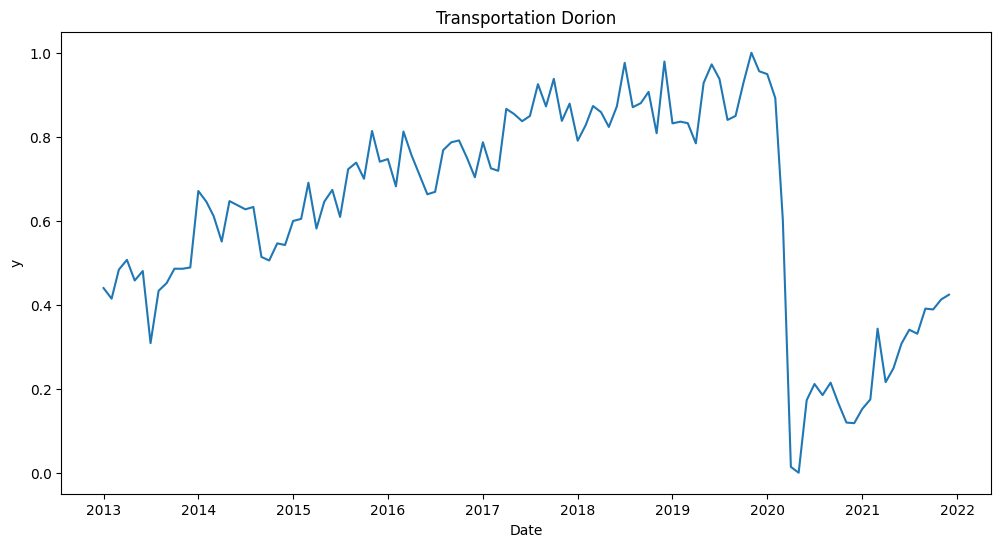

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_transportation_dorion.index, lstm_transportation_dorion['Transportation'], label='Original Data')
plt.title('Transportation Dorion')
plt.xlabel('Date')
plt.ylabel('y')

In [26]:
#Scaling the data
scaler = MinMaxScaler()
lstm_transportation_dorion[['Transportation']] = scaler.fit_transform(lstm_transportation_dorion[['Transportation']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_transportation_dorion) * 0.8)
train, test = lstm_transportation_dorion[:train_size], lstm_transportation_dorion[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Transportation'].values, sequence_length)
X_test, y_test = create_sequences(test['Transportation'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


1/1 [==============================] - 0s 41ms/step


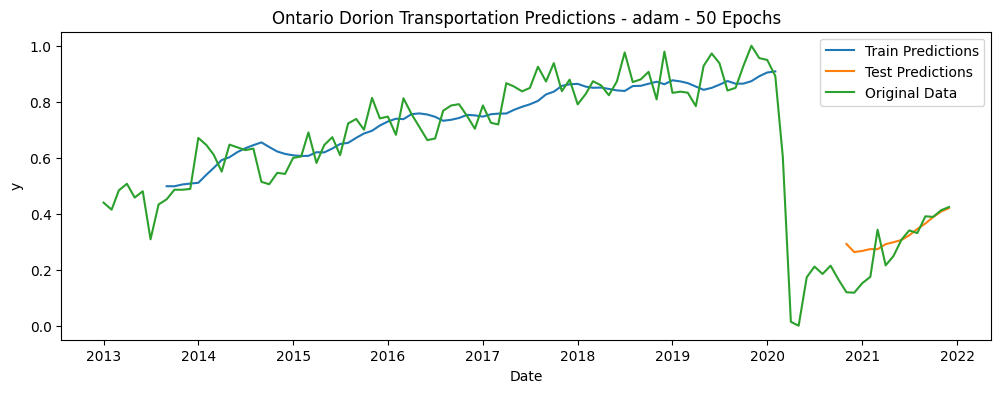

Metrics for adam - 50 Epochs:
Train MSE: 0.032866584515233506
Test MSE: 0.015503625495224113
Train MAE: 0.053573587407084455
Test MAE: 0.05677419854630313
Train RMSE: 0.06561111642165755
Test RMSE: 0.07939346241094564
1/1 [==============================] - 0s 53ms/step


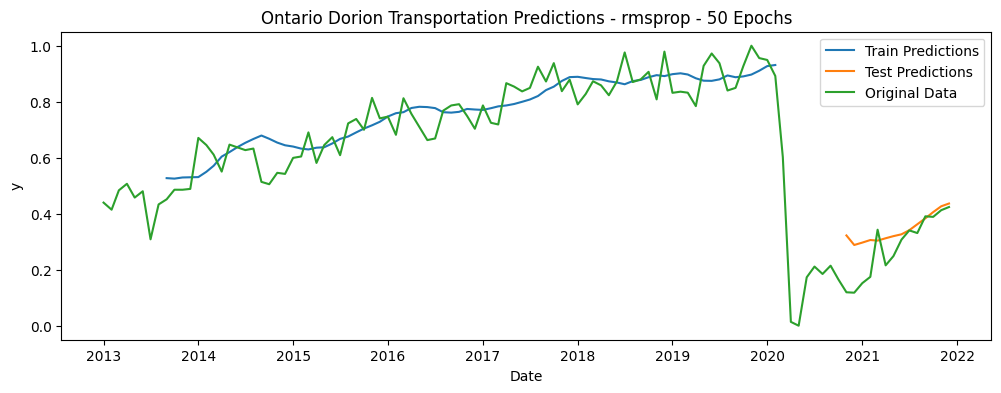

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.03298891402600533
Test MSE: 0.0173781631008693
Train MAE: 0.05445769088930836
Test MAE: 0.06847011974654378
Train RMSE: 0.06606029676585219
Test RMSE: 0.0950648251738
1/1 [==============================] - 0s 45ms/step


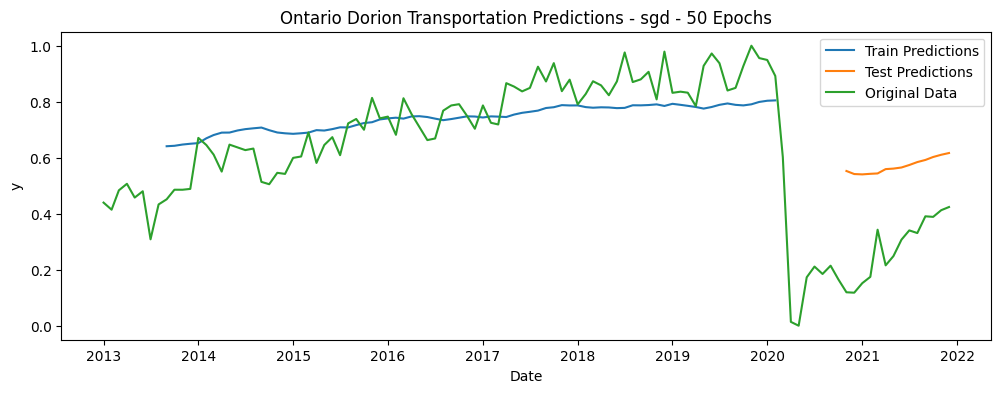

Metrics for sgd - 50 Epochs:
Train MSE: 0.021352512445290715
Test MSE: 0.09443673869637173
Train MAE: 0.08399336843791531
Test MAE: 0.28722689806537155
Train RMSE: 0.10171973745032883
Test RMSE: 0.2997058115651966
1/1 [==============================] - 0s 42ms/step


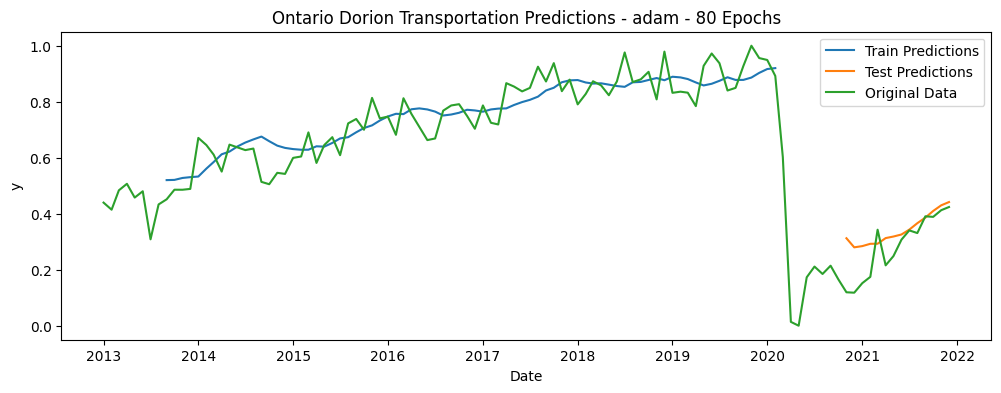

Metrics for adam - 80 Epochs:
Train MSE: 0.03194467543690807
Test MSE: 0.017609419780348887
Train MAE: 0.053200089958263044
Test MAE: 0.06713616992520785
Train RMSE: 0.06452444859239237
Test RMSE: 0.09042498428983407
1/1 [==============================] - 0s 66ms/step


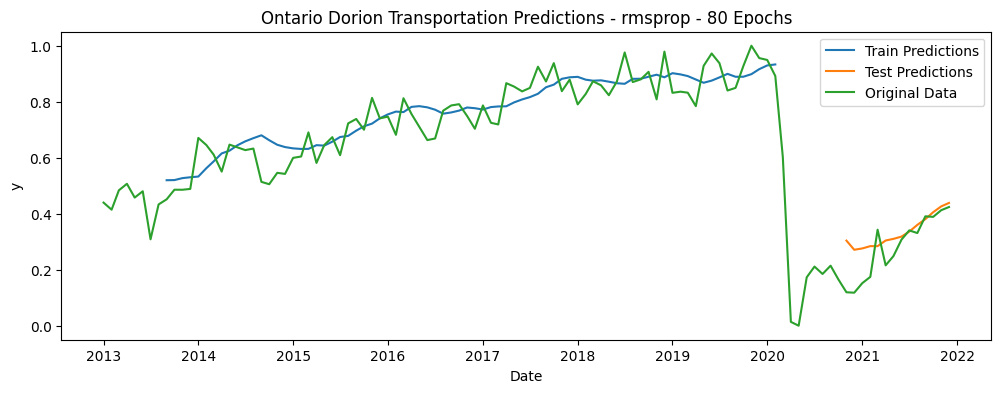

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.03290858820881464
Test MSE: 0.017041266287818935
Train MAE: 0.05326806490130618
Test MAE: 0.06283180917372891
Train RMSE: 0.0647109962536346
Test RMSE: 0.08529806323896372
1/1 [==============================] - 0s 52ms/step


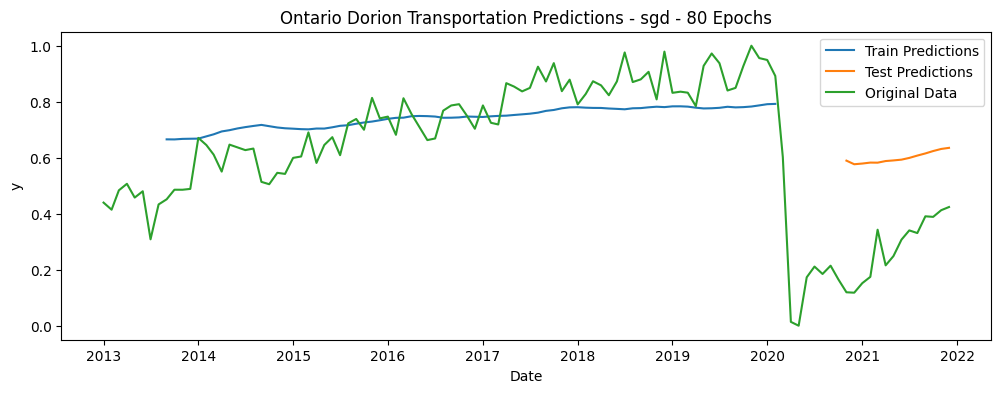

Metrics for sgd - 80 Epochs:
Train MSE: 0.020650276175779546
Test MSE: 0.11170970879514468
Train MAE: 0.08977418449444496
Test MAE: 0.31633812588426935
Train RMSE: 0.10861845046964506
Test RMSE: 0.32914840555588487
1/1 [==============================] - 0s 45ms/step


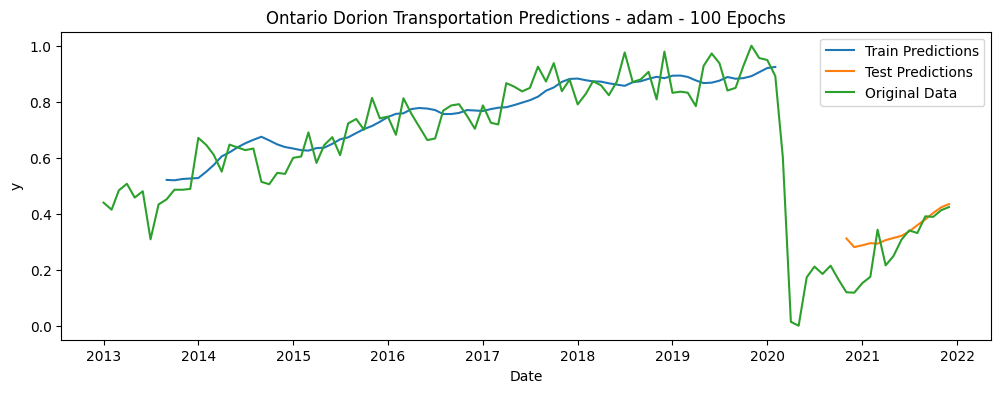

Metrics for adam - 100 Epochs:
Train MSE: 0.03264743367715762
Test MSE: 0.016883714135440573
Train MAE: 0.05355787118914113
Test MAE: 0.06470435082272989
Train RMSE: 0.06511646367327618
Test RMSE: 0.08964339772033844
1/1 [==============================] - 0s 63ms/step


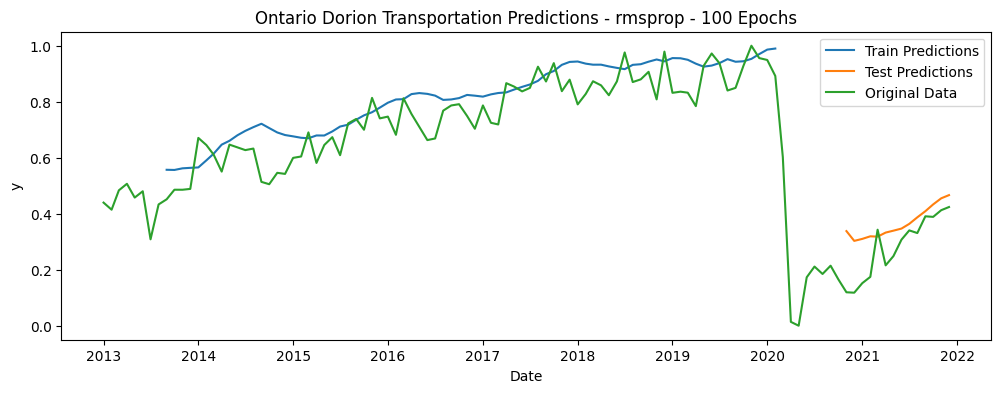

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.03775842654557458
Test MSE: 0.020914182709044448
Train MAE: 0.0705618401998763
Test MAE: 0.0861466425163768
Train RMSE: 0.08569103023966969
Test RMSE: 0.10748195290459193
1/1 [==============================] - 0s 60ms/step


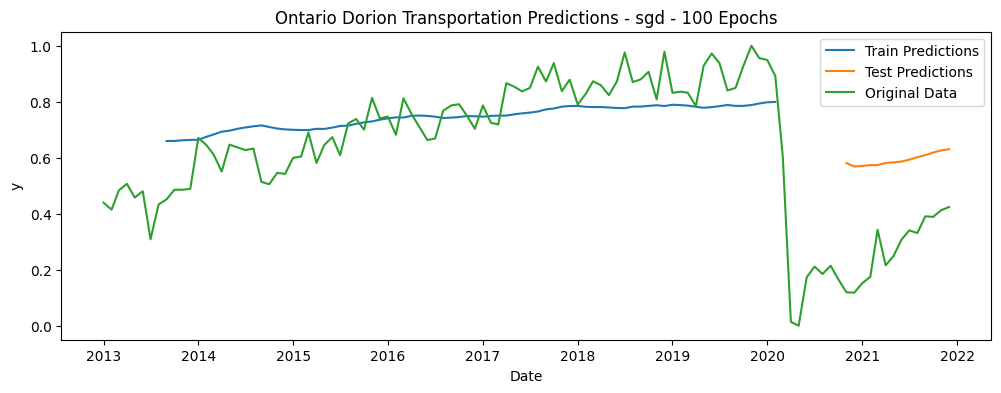

Metrics for sgd - 100 Epochs:
Train MSE: 0.020844283130244577
Test MSE: 0.10743945718155293
Train MAE: 0.08711146161342127
Test MAE: 0.30943531197283136
Train RMSE: 0.1057675946672536
Test RMSE: 0.32222886417344593
1/1 [==============================] - 0s 48ms/step


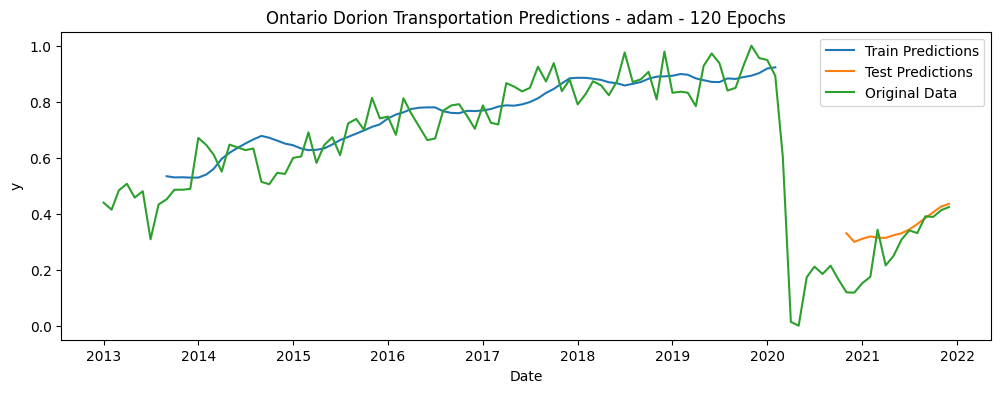

Metrics for adam - 120 Epochs:
Train MSE: 0.03264958912922664
Test MSE: 0.01761623575124313
Train MAE: 0.05568580138455591
Test MAE: 0.07150213990667387
Train RMSE: 0.06734854366304774
Test RMSE: 0.10053212628623566
1/1 [==============================] - 0s 77ms/step


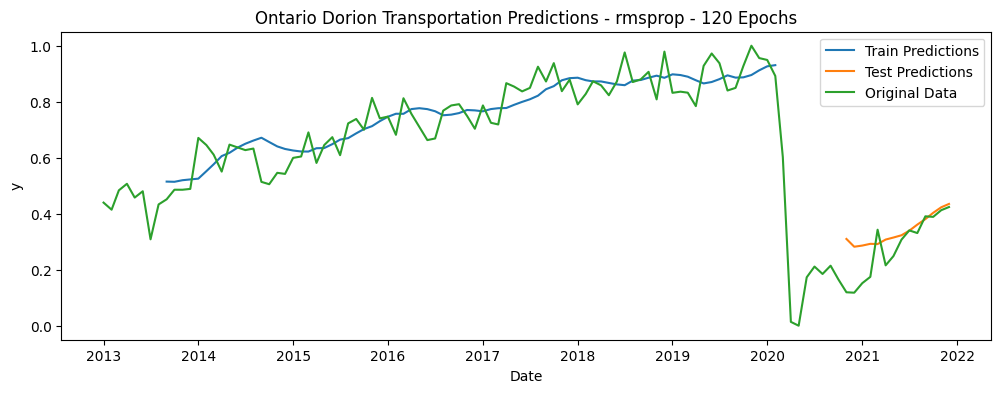

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.033234718272312544
Test MSE: 0.016969916821259288
Train MAE: 0.05280429800660219
Test MAE: 0.06495549286475369
Train RMSE: 0.06416392674572037
Test RMSE: 0.0895941471212379
1/1 [==============================] - 0s 65ms/step


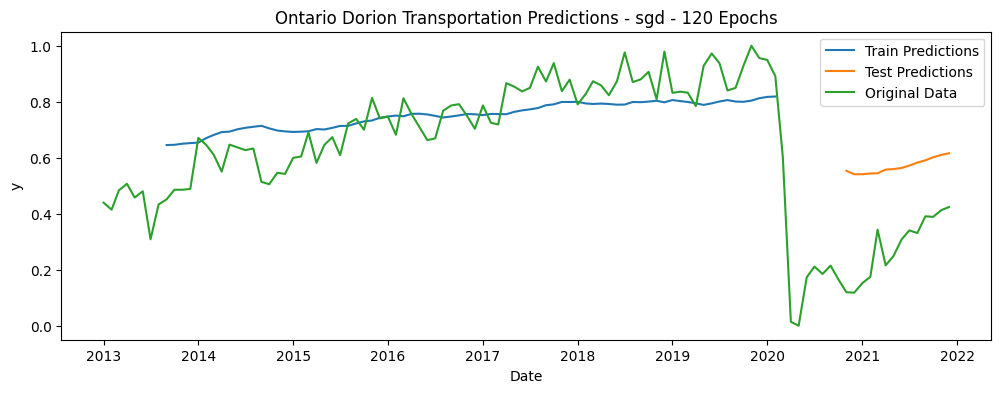

Metrics for sgd - 120 Epochs:
Train MSE: 0.02147783174566883
Test MSE: 0.09397198044078524
Train MAE: 0.08017200671921668
Test MAE: 0.2864573084368795
Train RMSE: 0.09816396260809937
Test RMSE: 0.2990885166461033


In [27]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_transportation_dorion.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_transportation_dorion.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_transportation_dorion.index, lstm_transportation_dorion['Transportation'], label='Original Data')
        plt.title(f'Ontario Dorion Transportation Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Transportation'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Transportation'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

# Moosone Agriculture

In [28]:
lstm_agriculture_moosone = lstm[lstm['Station Name'] == 'Moosone'][['Date', 'Agriculture']]
lstm_agriculture_moosone.set_index('Date', inplace=True)
lstm_agriculture_moosone.index = pd.to_datetime(lstm_agriculture_moosone.index)

In [29]:
lstm_agriculture_moosone['Agriculture'].head()


Date
2013-01-01    1.041940
2013-02-01    1.112734
2013-03-01    1.040278
2013-04-01    1.125648
2013-05-01    1.182806
Name: Agriculture, dtype: float64

In [30]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [31]:
sequence_length = 11
X, y = create_sequences(lstm_agriculture_moosone['Agriculture'].values, sequence_length)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [34]:
n_steps =11
n_features =1

In [35]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [36]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

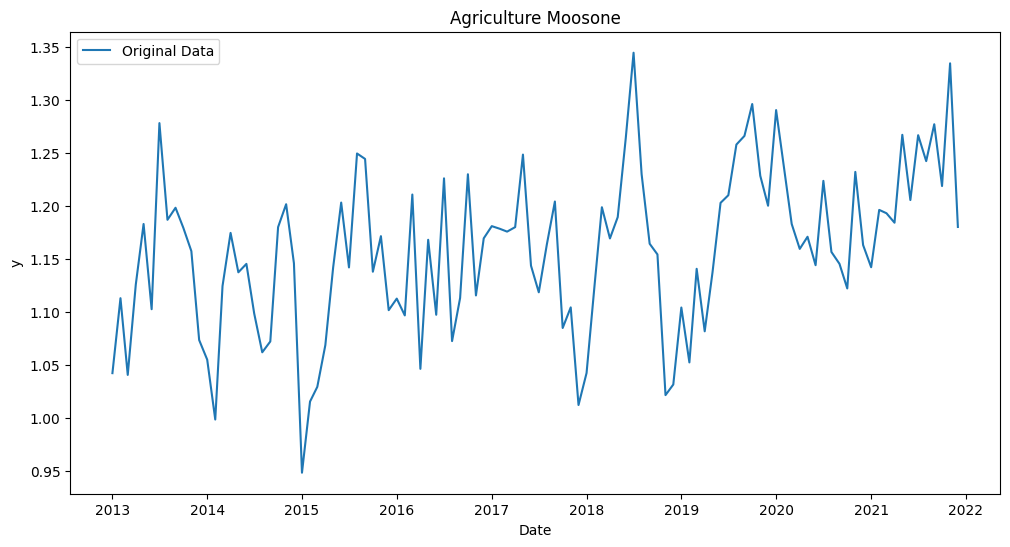

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_agriculture_moosone.index, lstm_agriculture_moosone['Agriculture'], label='Original Data')
plt.title('Agriculture Moosone')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [45]:
#Scaling the data
scaler = MinMaxScaler()
lstm_agriculture_moosone[['Agriculture']] = scaler.fit_transform(lstm_agriculture_moosone[['Agriculture']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_agriculture_moosone) * 0.8)
train, test = lstm_agriculture_moosone[:train_size], lstm_agriculture_moosone[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 15  # Adjust based on your data

X_train, y_train = create_sequences(train['Agriculture'].values, sequence_length)
X_test, y_test = create_sequences(test['Agriculture'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

1/1 [==============================] - 0s 29ms/step


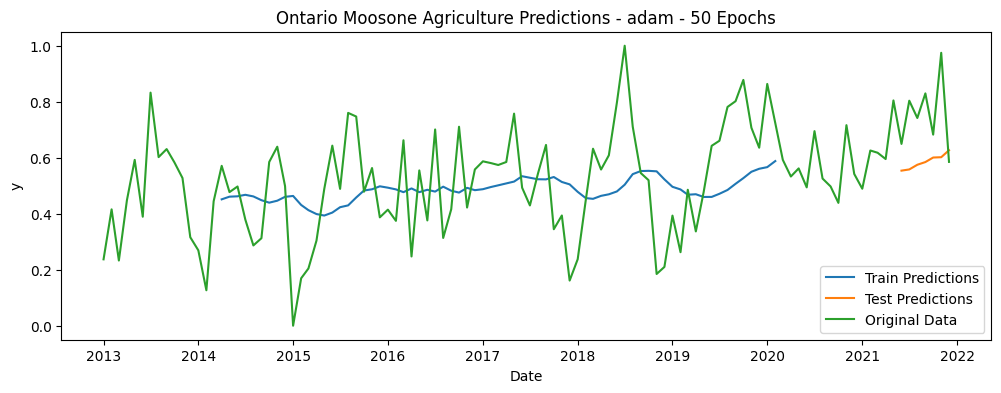

Metrics for adam - 50 Epochs:
Train MSE: 0.04003368100286938
Test MSE: 0.042867641846307494
Train MAE: 0.15760573907240813
Test MAE: 0.1784979449549326
Train RMSE: 0.19226976608275523
Test RMSE: 0.20870656996855486
1/1 [==============================] - 0s 31ms/step


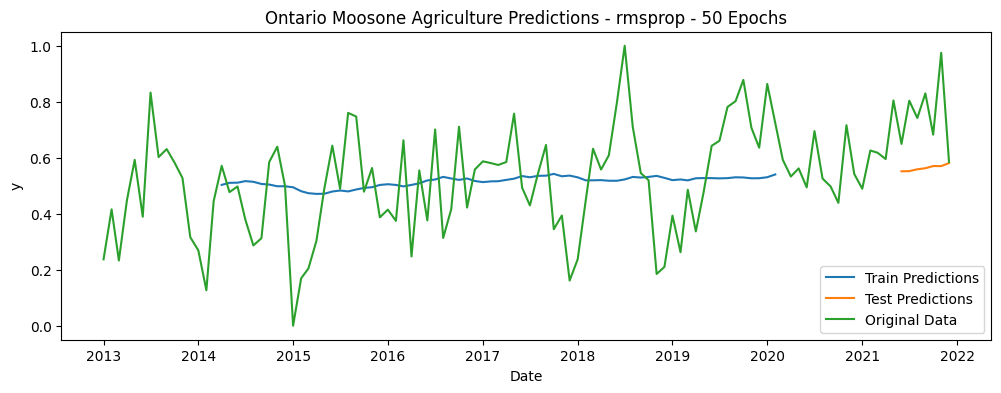

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.03801380554137089
Test MSE: 0.0502375164202449
Train MAE: 0.1553067282087417
Test MAE: 0.1887276101559685
Train RMSE: 0.1923548951131706
Test RMSE: 0.224976046067964
1/1 [==============================] - 0s 33ms/step


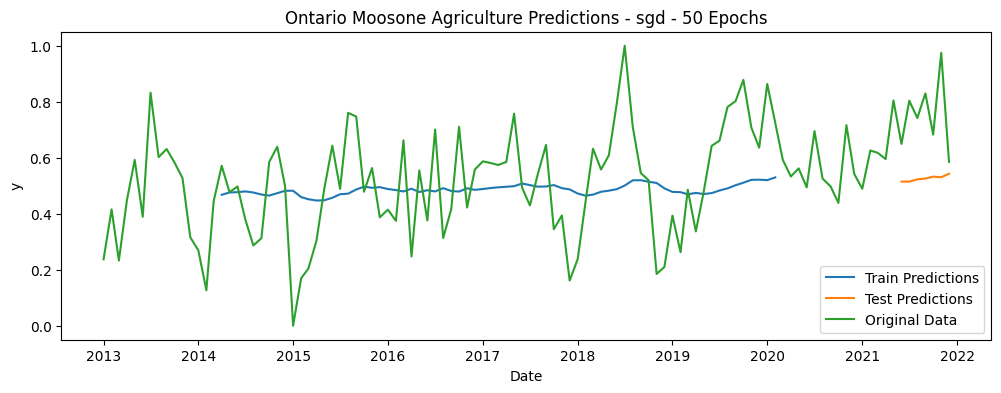

Metrics for sgd - 50 Epochs:
Train MSE: 0.03873736333800434
Test MSE: 0.06580421477948947
Train MAE: 0.15488226862367652
Test MAE: 0.22626622374784386
Train RMSE: 0.19090411779572766
Test RMSE: 0.2574912319058724
1/1 [==============================] - 0s 37ms/step


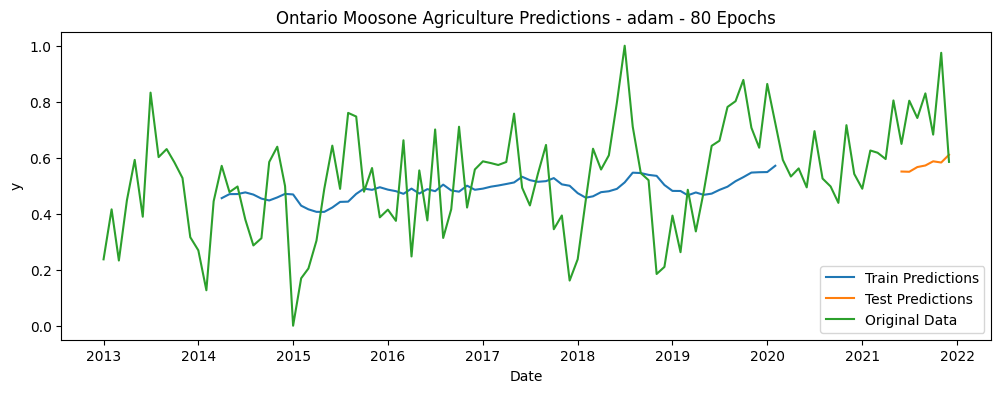

Metrics for adam - 80 Epochs:
Train MSE: 0.03952355612454486
Test MSE: 0.046652542946187155
Train MAE: 0.15442703008255285
Test MAE: 0.18539237164135575
Train RMSE: 0.18899568219561103
Test RMSE: 0.21858521437184625
1/1 [==============================] - 0s 35ms/step


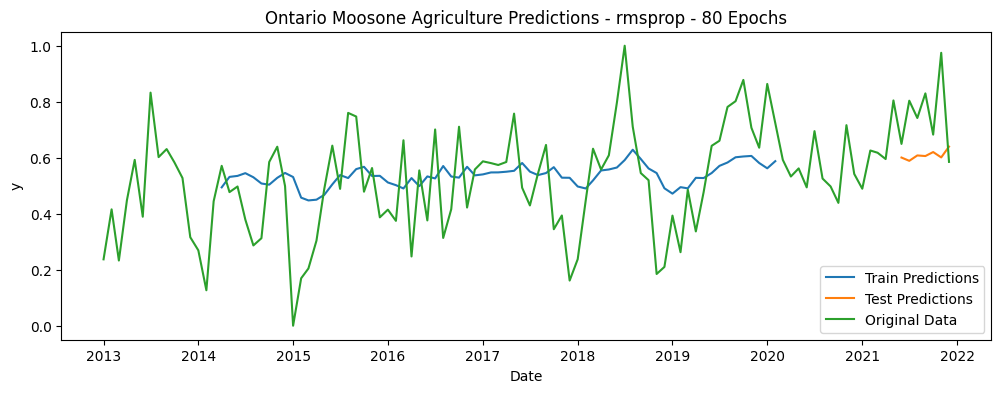

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.039642122411622384
Test MSE: 0.03525168369717489
Train MAE: 0.1439648378847984
Test MAE: 0.1587924535483556
Train RMSE: 0.17882082072463462
Test RMSE: 0.19380613718662903
1/1 [==============================] - 0s 31ms/step


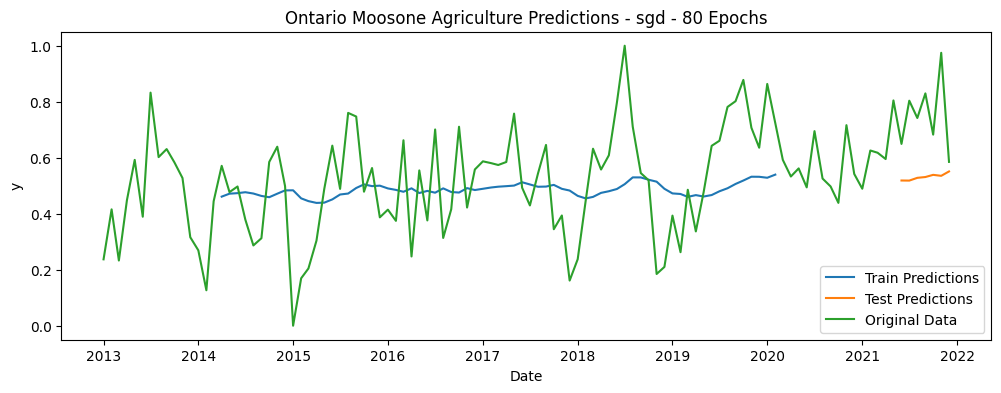

Metrics for sgd - 80 Epochs:
Train MSE: 0.03896582859505531
Test MSE: 0.06339596545234479
Train MAE: 0.15398189561298262
Test MAE: 0.2208193214046388
Train RMSE: 0.18943662976999082
Test RMSE: 0.2530641326520301
1/1 [==============================] - 0s 30ms/step


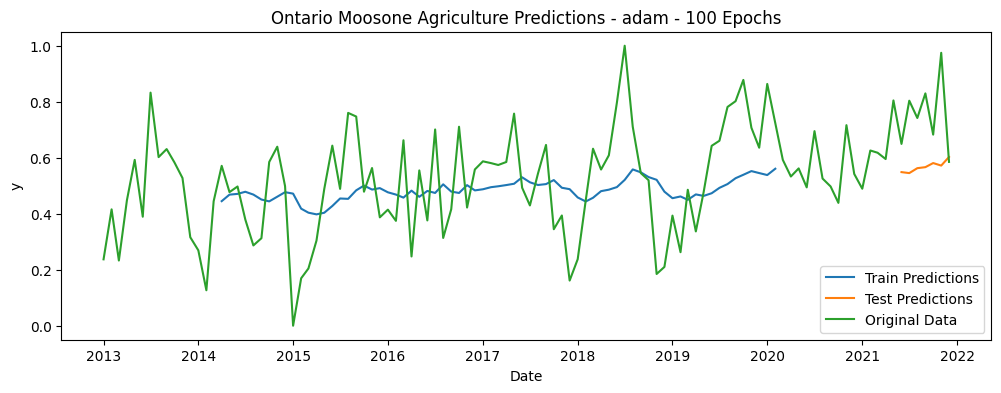

Metrics for adam - 100 Epochs:
Train MSE: 0.039795323189901435
Test MSE: 0.048752564754444394
Train MAE: 0.15160028917152926
Test MAE: 0.18911597597986546
Train RMSE: 0.18533993450100975
Test RMSE: 0.22404754654135206
1/1 [==============================] - 0s 39ms/step


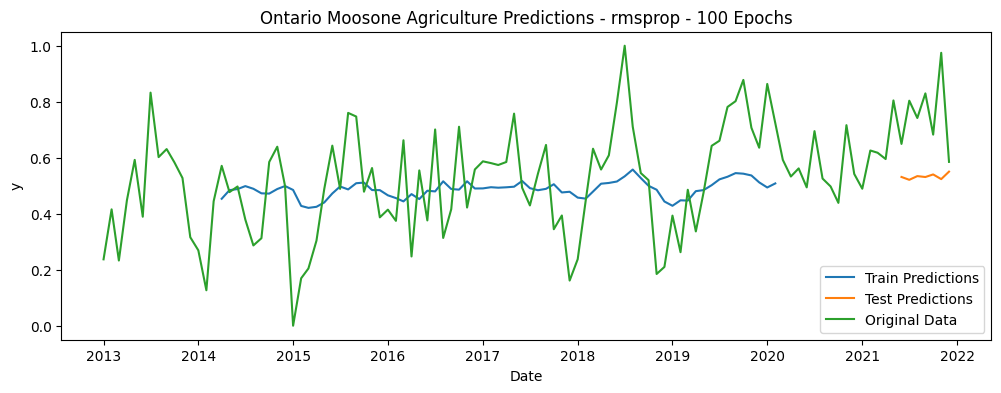

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.03920931616799722
Test MSE: 0.06269401191017536
Train MAE: 0.14734053606969416
Test MAE: 0.21929194386732018
Train RMSE: 0.1815756006866381
Test RMSE: 0.2538371332241819
1/1 [==============================] - 0s 32ms/step


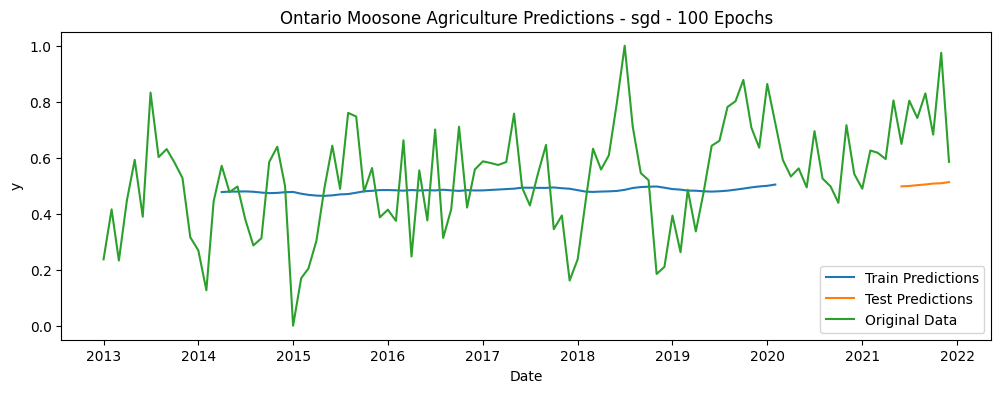

Metrics for sgd - 100 Epochs:
Train MSE: 0.038648885026555425
Test MSE: 0.07592550475899265
Train MAE: 0.1582693014103073
Test MAE: 0.2477468393977484
Train RMSE: 0.19549923373005082
Test RMSE: 0.27565835936084543
1/1 [==============================] - 0s 29ms/step


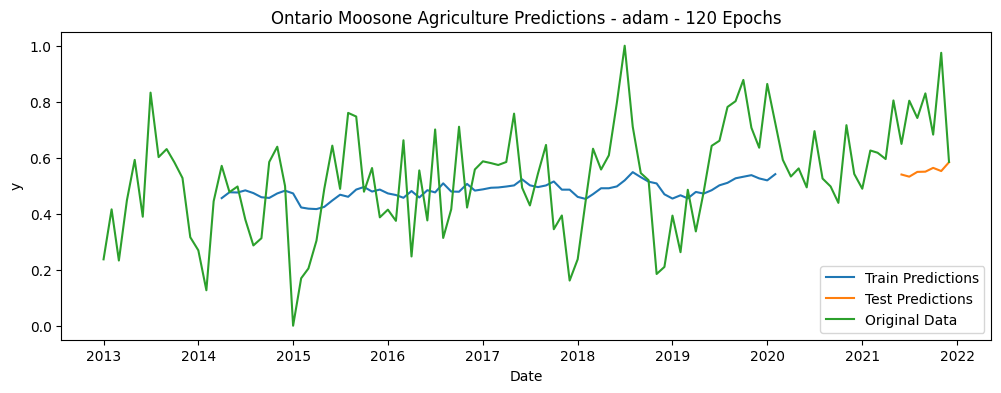

Metrics for adam - 120 Epochs:
Train MSE: 0.039303331134247034
Test MSE: 0.05448219206458846
Train MAE: 0.15096786286136676
Test MAE: 0.1993009973019646
Train RMSE: 0.18534486450865784
Test RMSE: 0.23702288436432328
1/1 [==============================] - 0s 29ms/step


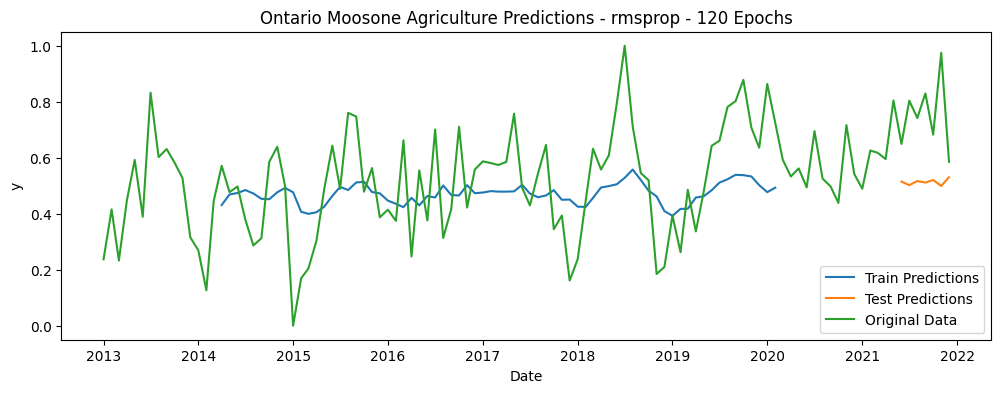

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.040710924973431414
Test MSE: 0.07168992208214088
Train MAE: 0.14775582454365482
Test MAE: 0.23889665659200585
Train RMSE: 0.18146352596943532
Test RMSE: 0.2716625387298376
1/1 [==============================] - 0s 32ms/step


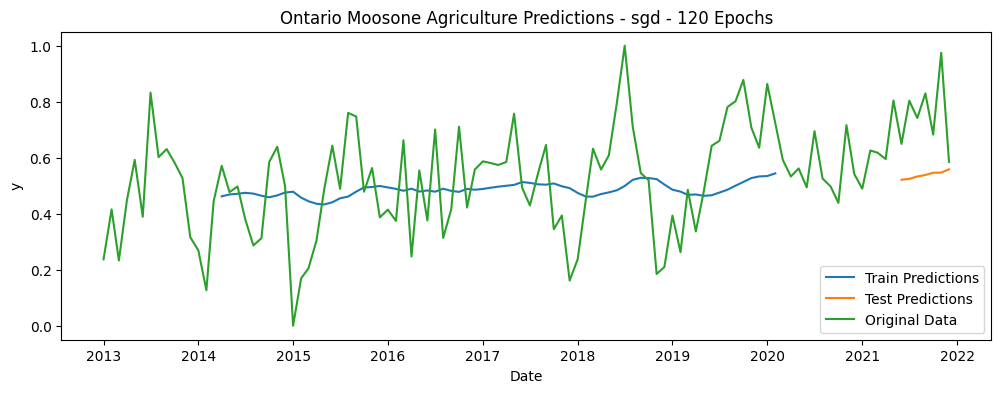

Metrics for sgd - 120 Epochs:
Train MSE: 0.03899603973913711
Test MSE: 0.0604615488104263
Train MAE: 0.1562737865498207
Test MAE: 0.21398387777169553
Train RMSE: 0.19186328200791256
Test RMSE: 0.24647018992863617


In [46]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_agriculture_moosone.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_agriculture_moosone.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_agriculture_moosone.index, lstm_agriculture_moosone['Agriculture'], label='Original Data')
        plt.title(f'Ontario Moosone Agriculture Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Agriculture'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Agriculture'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')